In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('processed_data.csv')
df.head(3)

,Teriyaki Steak,Maryland Fried Chicken,Hot Crab Dip,Lemon Squares,Chicken Paprika,Shrimp Pineapple Fried Rice,Easy Oven Baked Potatoes,Chicken With Pineapple,Orange-Poppy Seed Pound Cake,Egg Foo Young,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


## Model fitting
### Multiple linear regression model
As the first step, a multiple linear regression model was fitted. Ten-fold cross-validation was used to validate the model. The evaluation metrics, RMSE, MAE, and R-squared for both training and validation sets are as below.

In [3]:
import sklearn
import sklearn.linear_model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

# divide data into dependent (Y) and independent (X) data
df = sklearn.utils.shuffle(df)

x_columns = df.columns.drop('food_prep_time_minutes')
X = df[x_columns].values
Y = df['food_prep_time_minutes'].values


k=10
num_val_samples = len(X)//k
rmse_test_history = []
rmse_train_history = []

mae_test_history = []
mae_train_history = []
r_sqr_history = []

regressor = sklearn.linear_model.LinearRegression()
    
for i in range (k):
    print('processing fold #', i+1)
    X_val = X[i*num_val_samples: (i+1)*num_val_samples]
    Y_val = Y[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_X_train = np.concatenate([X[:i*num_val_samples], X[(i+1)*num_val_samples:]], axis=0)
    partial_Y_train = np.concatenate([Y[:i*num_val_samples], Y[(i+1)*num_val_samples:]], axis=0)
   
    regressor.fit(partial_X_train,partial_Y_train)
    
    pred_train = regressor.predict(partial_X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(partial_Y_train, pred_train))
    mae_train = metrics.mean_absolute_error(partial_Y_train, pred_train)
    
    pred_test = regressor.predict(X_val)
    rmse_test = np.sqrt(metrics.mean_squared_error(Y_val, pred_test))
    mae_test = metrics.mean_absolute_error(Y_val, pred_test)
    r_sqr = r2_score(Y_val, pred_test)
    
    rmse_test_history.append(rmse_test)
    rmse_train_history.append(rmse_train)
    mae_test_history.append(mae_test)
    mae_train_history.append(mae_train)
    r_sqr_history.append(r_sqr)
    
avg_rmse_test = np.mean(rmse_test_history)
avg_rmse_train = np.mean(rmse_train_history)
avg_mae_test = np.mean(mae_test_history)    
avg_mae_train = np.mean(mae_train_history)
avg_r_sqr = np.mean(r_sqr_history)

print('train RMSE: {:7} | val RMSE : {:5} | Train MAE: {:5} | Val MAE {:5} | R squared: {:5} '.
          format(avg_rmse_train, avg_rmse_test, avg_mae_train, avg_mae_test, avg_r_sqr))

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
processing fold # 10
train RMSE: 7.214216188266144 | val RMSE : 7.225008503308395 | Train MAE: 5.859130195558458 | Val MAE 5.868727857581713 | R squared: 0.5727181984805136 


The above output shows that the RMSE and R-squared for validation set are 7.23 and 0.57 respectively, which is not a good performance.

### Ridge regression model

As the next step, a ridge regression model was fitted. The performance of the model was evaluated for different alpha values.

In [4]:
k=10
num_val_samples = len(X)//k
alphas = [0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    rmse_test_history = []
    rmse_train_history = []

    mae_test_history = []
    mae_train_history = []
    r_sqr_history = []

    ridge = sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=True, random_state=505)

    for i in range (k):
        print('processing fold #', i+1)
        X_val = X[i*num_val_samples: (i+1)*num_val_samples]
        Y_val = Y[i*num_val_samples:(i+1)*num_val_samples]

        partial_X_train = np.concatenate([X[:i*num_val_samples], X[(i+1)*num_val_samples:]], axis=0)
        partial_Y_train = np.concatenate([Y[:i*num_val_samples], Y[(i+1)*num_val_samples:]], axis=0)

        ridge.fit(partial_X_train,partial_Y_train)

        pred_train = ridge.predict(partial_X_train)
        rmse_train = np.sqrt(metrics.mean_squared_error(partial_Y_train, pred_train))
        mae_train = metrics.mean_absolute_error(partial_Y_train, pred_train)

        pred_test = ridge.predict(X_val)
        rmse_test = np.sqrt(metrics.mean_squared_error(Y_val, pred_test))
        mae_test = metrics.mean_absolute_error(Y_val, pred_test)
        r_sqr = r2_score(Y_val, pred_test)

        rmse_test_history.append(rmse_test)
        rmse_train_history.append(rmse_train)
        mae_test_history.append(mae_test)
        mae_train_history.append(mae_train)
        r_sqr_history.append(r_sqr)

    avg_rmse_test = np.mean(rmse_test_history)
    avg_rmse_train = np.mean(rmse_train_history)
    avg_mae_test = np.mean(mae_test_history)    
    avg_mae_train = np.mean(mae_train_history)
    avg_r_sqr = np.mean(r_sqr_history)

    print('alpha : {:5} | train RMSE: {:5} | val RMSE : {:5} | Train MAE: {:5} | Val MAE {:5} | R squared: {:5} '.
              format(alpha, avg_rmse_train, avg_rmse_test, avg_mae_train, avg_mae_test, avg_r_sqr))

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
processing fold # 10
alpha : 0.001 | train RMSE: 7.210644286110265 | val RMSE : 7.221935818238103 | Train MAE: 5.856441468292593 | Val MAE 5.865863271234259 | R squared: 0.5730835065550723 
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
processing fold # 10
alpha :  0.01 | train RMSE: 7.210644286117718 | val RMSE : 7.221935799393833 | Train MAE: 5.856441903608157 | Val MAE 5.865863700905922 | R squared: 0.5730835088533126 
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
processing fold # 10
alpha :   0.1 | train RMSE: 7.210644286862946 | val RMSE : 

According to the above outputs, there is no significant improvement of the performance.

### Artificial Neural Network

As the final model, a neural network was used to predict the food preparation time. 
#### Design
- There are 114 input neurons.
- Two hidden layers. First hidden layer has 228 neurons and the second hidden layer has 57 neurons.
- One output neuron.
- The intermediate layers use *rectified linear unit (relu)* function as their activation function:
    $$\text{relu}(x) = \text{max}(0,x)$$
- The training was done using *Adam* as the optimizer.


In [5]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [6]:
from keras.optimizers import Adam
model = models.Sequential()
model.add(layers.Dense(228, activation = 'relu', 
                       input_shape=(X.shape[1],)))
model.add(layers.Dense(57, activation = 'relu'))
model.add(layers.Dense(1))
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 228)               26220     
_________________________________________________________________
dense_2 (Dense)              (None, 57)                13053     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 58        
Total params: 39,331
Trainable params: 39,331
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# model with two hidden layers (228,57) 
# Cross validation 
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from keras.callbacks import EarlyStopping

k=10
num_val_samples = len(X)//k

all_mean_squared_error_train = []
all_mean_squared_error_val = []
rmse_test_history = []
mae_test_history = []
r_squared_history =[]


for i in range (k):
    print('processing fold #', i)
    #       split data as train and validation
    X_val = X[i*num_val_samples: (i+1)*num_val_samples]
    Y_val = Y[i*num_val_samples:(i+1)*num_val_samples]

    partial_X_train = np.concatenate([X[:i*num_val_samples], X[(i+1)*num_val_samples:]], axis=0)
    partial_Y_train = np.concatenate([Y[:i*num_val_samples], Y[(i+1)*num_val_samples:]], axis=0)

    #       construct model
    model = models.Sequential()
    model.add(layers.Dense(228, activation = 'relu', input_shape=(partial_X_train.shape[1],)))
    model.add(layers.Dense(57, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss ='mse', metrics = ['mae'])
    
    #       Train model
    history = model.fit(partial_X_train, partial_Y_train, validation_data=(X_val, Y_val), epochs=50, 
                        verbose=0, batch_size = 32)
    mse_history_val = history.history['val_loss']
    mse_history_train =  history.history['loss']
    all_mean_squared_error_train.append(mse_history_train)
    all_mean_squared_error_val.append(mse_history_val)

    #       Predict on the validation set
    pred = model.predict(X_val)
    
    #      Calculate performance metrics
    rmse = np.sqrt(metrics.mean_squared_error(Y_val, pred))
    mae = metrics.mean_absolute_error(Y_val, pred)
    R_sq = r2_score(Y_val, pred)
   
    rmse_test_history.append(rmse)
    mae_test_history.append(mae)
    r_squared_history.append(R_sq)
    

mean_test_rmse = np.mean(rmse_test_history)
mean_mae = np.mean(mae_test_history)
mean_r_sqr = np.mean(r_squared_history)

print("Validation RMSE: {:5} | Validation MAE : {:5} | Validation R sqr : {:5}".
      format(mean_test_rmse, mean_mae, mean_r_sqr))



processing fold # 0



processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
Validation RMSE: 2.890191984554016 | Validation MAE : 2.2252537900090217 | Validation R sqr : 0.931622235506935


In [8]:
all_mean_squared_error_train = np.asarray(all_mean_squared_error_train)

In [9]:
train_mse = np.mean(all_mean_squared_error_train, axis=0)

In [10]:
all_mean_squared_error_val = np.asarray(all_mean_squared_error_val)
val_mse = np.mean(all_mean_squared_error_val, axis=0)
val_mse.shape

(50,)

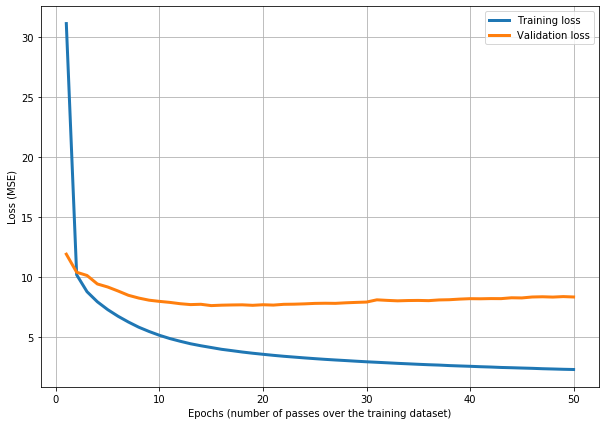

In [11]:
%matplotlib inline
fig =plt.figure(figsize = (10,7))
plt.plot(range(1,len(train_mse)+1),train_mse, label = 'Training loss', linewidth=3)
plt.plot(range(1,len(val_mse)+1), val_mse, label = 'Validation loss', linewidth=3)
plt.legend()
plt.xlabel('Epochs (number of passes over the training dataset)')
plt.ylabel('Loss (MSE)')
plt.grid(True)

### Stop the training process when the validation loss is no longer reduces using 'early stopping' with cross validation

In [12]:
# model with two hidden layers (228,57) 
# Cross validation with early stopping
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from keras.callbacks import EarlyStopping

k=10
num_val_samples = len(X)//k


epochs_needed = []
rmse_train_history = []
rmse_test_history = []
mae_test_history = []
r_squared_history =[]


for i in range (k):
    print('processing fold #', i)
    #       split data as train and validation
    X_val = X[i*num_val_samples: (i+1)*num_val_samples]
    Y_val = Y[i*num_val_samples:(i+1)*num_val_samples]

    partial_X_train = np.concatenate([X[:i*num_val_samples], X[(i+1)*num_val_samples:]], axis=0)
    partial_Y_train = np.concatenate([Y[:i*num_val_samples], Y[(i+1)*num_val_samples:]], axis=0)

    #       construct model
    model = models.Sequential()
    model.add(layers.Dense(228, activation = 'relu', input_shape=(partial_X_train.shape[1],)))
    model.add(layers.Dense(57, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss ='mse', metrics = ['mae'])

    #       set early stopping 
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta = 1e-3, 
                               restore_best_weights = False,)

    #       Train model
    history = model.fit(partial_X_train, partial_Y_train, validation_data=(X_val, Y_val), epochs=50, 
                        verbose=0, batch_size = 32, callbacks=[early_stop])
    epochs = early_stop.stopped_epoch
    epochs_needed.append(epochs)

    #       Predict on the validation set
    pred = model.predict(X_val)
    
    #      Calculate performance metrics
    rmse = np.sqrt(metrics.mean_squared_error(Y_val, pred))
    mae = metrics.mean_absolute_error(Y_val, pred)
    R_sq = r2_score(Y_val, pred)
   
    rmse_test_history.append(rmse)
    mae_test_history.append(mae)
    r_squared_history.append(R_sq)
    
mean_epochs = np.mean(epochs_needed)
mean_test_rmse = np.mean(rmse_test_history)
mean_mae = np.mean(mae_test_history)
mean_r_sqr = np.mean(r_squared_history)

print("Validation RMSE: {:5} | Validation MAE : {:5} | Validation R sqr : {:5} | mean epochs {:5}".
      format(mean_test_rmse, mean_mae, mean_r_sqr, mean_epochs))



processing fold # 0
Epoch 00021: early stopping
processing fold # 1
Epoch 00021: early stopping
processing fold # 2
Epoch 00036: early stopping
processing fold # 3
Epoch 00028: early stopping
processing fold # 4
Epoch 00025: early stopping
processing fold # 5
Epoch 00029: early stopping
processing fold # 6
Epoch 00026: early stopping
processing fold # 7
Epoch 00025: early stopping
processing fold # 8
Epoch 00041: early stopping
processing fold # 9
Epoch 00037: early stopping
Validation RMSE: 2.855575542287307 | Validation MAE : 2.205950111687183 | Validation R sqr : 0.9331215088163244 | mean epochs  27.9


In [13]:
model = models.Sequential()
model.add(layers.Dense(228, activation = 'relu', input_shape=(partial_X_train.shape[1],)))
model.add(layers.Dense(57, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss ='mse', metrics = ['mae'])
history = model.fit(X, Y, epochs=23, verbose=0, batch_size = 32)

### Predict food prep time using the fitted model

In [14]:
test_df = pd.read_csv("test_set.csv")
test_df.head(3)

,order_id,Teriyaki Steak,Maryland Fried Chicken,Hot Crab Dip,Lemon Squares,Chicken Paprika,Shrimp Pineapple Fried Rice,Easy Oven Baked Potatoes,Chicken With Pineapple,Orange-Poppy Seed Pound Cake,...,Veal Parmigan,Spinach Salad with Avocado,Pea Salad,Chili Chicken,Eggplant Rollatini,Prune Nut Bars,Green Beans Salerno,Pasta Primavera,Savory Chicken Casserole,day_time
0,61fb5702-9aca-44e9-9567-5d075dda72c8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9/4/2019 15:30
1,5a53c40f-752b-43f9-954b-8c160ade3e55,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,9/1/2019 19:54
2,e45c8a8c-990c-465e-91a8-dec36db127d7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,9/6/2019 13:00


In [15]:
test_df.dtypes

order_id                    object
Teriyaki Steak               int64
Maryland Fried Chicken       int64
Hot Crab Dip                 int64
Lemon Squares                int64
                             ...  
Prune Nut Bars               int64
Green Beans Salerno          int64
Pasta Primavera              int64
Savory Chicken Casserole     int64
day_time                    object
Length: 92, dtype: object

In [16]:
test_df['day_time'] = pd.to_datetime(test_df['day_time']) 

In [17]:
test_df['hour'] = test_df['day_time'].dt.hour
test_df['hour'] = test_df['hour'].astype(str)

In [18]:
dummies = pd.get_dummies(test_df['hour'], prefix = 'hour')
print(dummies.shape)
dummies.head(3)

(20000, 24)


,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_df_final = pd.concat([test_df, dummies], axis = 1)
test_df_final.drop(['hour', 'order_id','day_time'], axis = 1, inplace = True)
test_df_final.head(3)

,Teriyaki Steak,Maryland Fried Chicken,Hot Crab Dip,Lemon Squares,Chicken Paprika,Shrimp Pineapple Fried Rice,Easy Oven Baked Potatoes,Chicken With Pineapple,Orange-Poppy Seed Pound Cake,Egg Foo Young,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
pred = model.predict(test_df_final)

In [21]:
results = pd.DataFrame({'order_id': test_df['order_id'], 'food_prep_time': pred[:,0]})

In [22]:
results.head(3)

,order_id,food_prep_time
0,61fb5702-9aca-44e9-9567-5d075dda72c8,36.082779
1,5a53c40f-752b-43f9-954b-8c160ade3e55,26.612577
2,e45c8a8c-990c-465e-91a8-dec36db127d7,28.703630
